In [ ]:
import pandas as pd
import numpy as np
from timeit import default_timer as timer
from datetime import timedelta
import re
import pickle
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt 

In [ ]:
# load raw data file for quotes and non quotes

nonquoteFile = open ("/content/drive/MyDrive/quote classification/row data/nonquote.txt", "rb")
nonquote = pickle.load(nonquoteFile)

quoteFile = open ("/content/drive/MyDrive/quote classification/row data/quote.txt", "rb")
quote = pickle.load(quoteFile)

In [ ]:
# convert pickle object to iterable list  
quote=list(quote)
nonquote=list(nonquote)

In [ ]:
def get_top_n_words(corpus, n=None,ngram=(1, 1),stopwords=None):
  """
    @params

    corpus : list of text from which word frequency to be generated (required)
    n : number of sample words to be return
    ngram : tuple stating size of ngram
    stopwords : string stating stopwords to be used
  """
  vec = CountVectorizer(ngram_range=ngram,stop_words =stopwords).fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0) 
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]


## **Ploting most frequent words without removing stop words** 


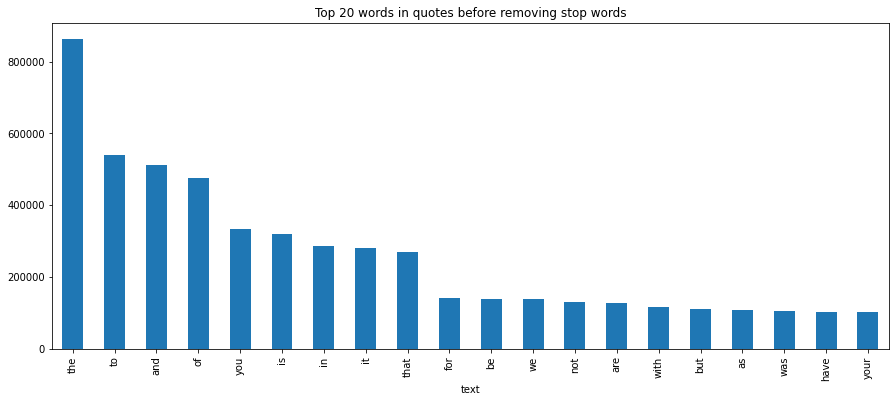

In [ ]:
# frequncy plot for quotes
quotes_freq = get_top_n_words(quote, 20)
freq_df = pd.DataFrame(quotes_freq, columns = ['text' , 'Count'])
plt.figure(figsize=(15,6))
freq_df.groupby('text').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar', x='text', y='Count', title='Top 20 words in quotes before removing stop words')


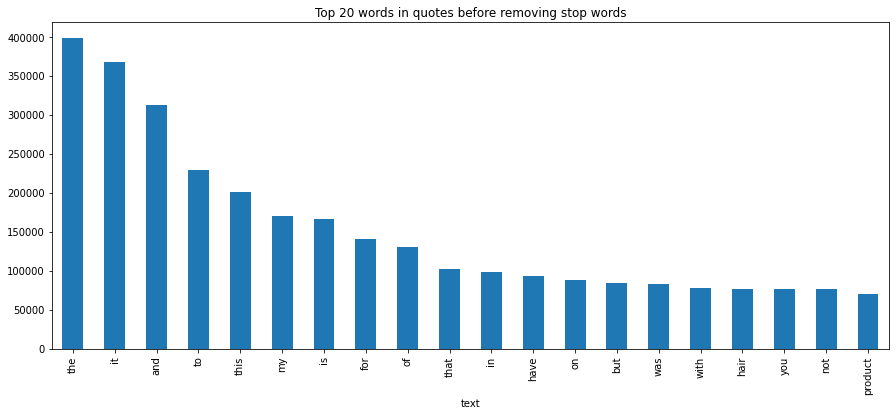

In [ ]:
# frequncy plot for non quotes
nonquotes_freq = get_top_n_words(nonquote, 20)
freq_df = pd.DataFrame(nonquotes_freq, columns = ['text' , 'Count'])
plt.figure(figsize=(15,6))
freq_df.groupby('text').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar', x='text', y='Count', title='Top 20 words in non quotes before removing stop words')

## **Ploting most frequent words after removing stop**

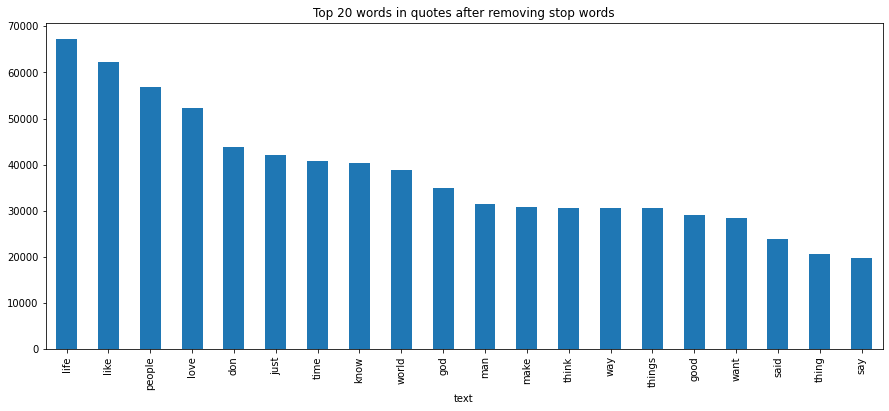

In [ ]:
# frequncy plot for quotes
quotes_freq = get_top_n_words(corpus=quote, n=20,stopwords='english')
freq_df = pd.DataFrame(quotes_freq, columns = ['text' , 'Count'])
plt.figure(figsize=(15,6))
freq_df.groupby('text').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar', x='text', y='Count', title='Top 20 words in quotes after removing stop words')


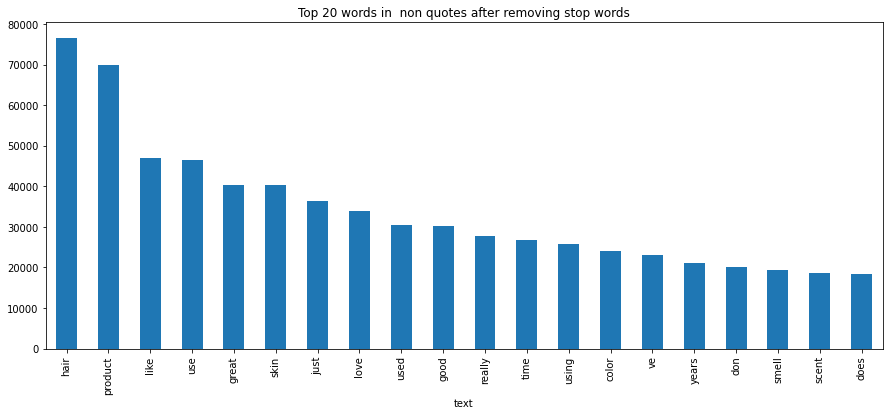

In [ ]:
# frequncy plot for non quotes
nonquotes_freq = get_top_n_words(corpus=nonquote, n=20,stopwords='english')
freq_df = pd.DataFrame(nonquotes_freq, columns = ['text' , 'Count'])
plt.figure(figsize=(15,6))
freq_df.groupby('text').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar', x='text', y='Count', title='Top 20 words in  non quotes after removing stop words')

## **Ploting bigram and trigram of quotes after removing stopwords**

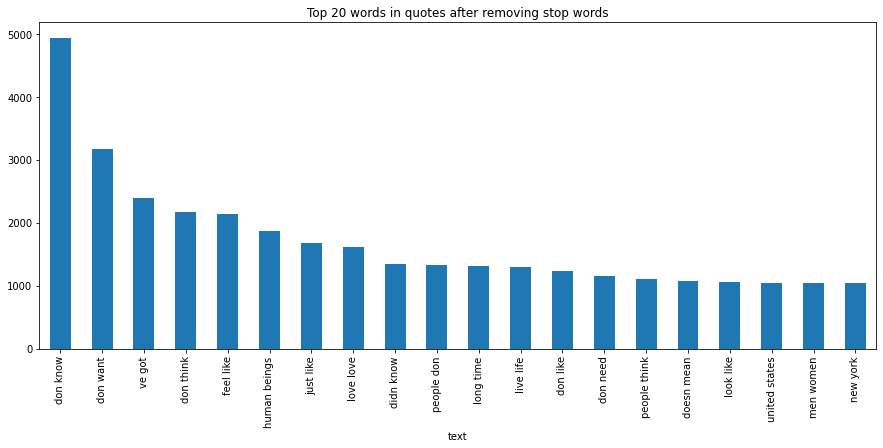

In [ ]:
# bigram plot for quotes
quotes_freq = get_top_n_words(corpus=quote, n=20,stopwords='english',ngram=(2,2))
freq_df = pd.DataFrame(quotes_freq, columns = ['text' , 'Count'])
plt.figure(figsize=(15,6))
freq_df.groupby('text').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar', x='text', y='Count', title='Top 20 words in quotes after removing stop words')

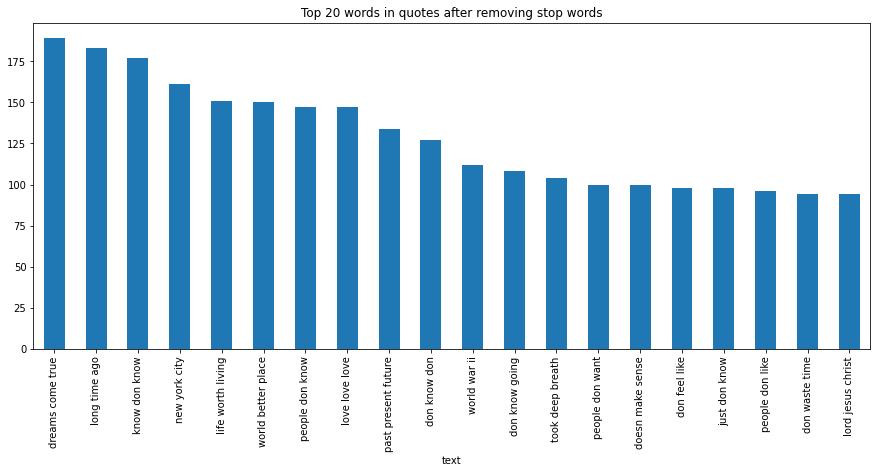

In [ ]:
# trigram plot for quotes
quotes_freq = get_top_n_words(corpus=quote, n=20,stopwords='english',ngram=(3,3))
freq_df = pd.DataFrame(quotes_freq, columns = ['text' , 'Count'])
plt.figure(figsize=(15,6))
freq_df.groupby('text').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar', x='text', y='Count', title='Top 20 words in quotes after removing stop words')